[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Title: Nothing Phone 2a Plus With MediaTek Dimensity 7350 Pro SoC, 50-Megapixel Front Camera Launched in India
URL: https://www.gadgets360.com/mobiles/news/nothing-phone-2a-plus-price-in-india-launch-sale-specifications-features-6229672
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

---

Title: Nothing Phone 2a Plus With MediaTek Dimensity 7350 Pro SoC, 50-Megapixel Front Camera Launched in India
URL: https://www.gadgets360.com/mobiles/news/nothing-phone-2a-plus-price-in-india-launch-sale-specifications-features-6229672
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

---

Title: iPhone 16 Dummy Units Leak Showing Five Colour Options, Redesigned Camera Bump
URL: https://www.gadgets360.com/mobiles/news/iphone-16-dummy-unit-colour-options-design-specifications-leak-6230987
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

---

Title: iPhone 16 Dummy Units Leak Showing Five Colour Options, Redesigned Camera Bump
URL: https://www.gadgets3

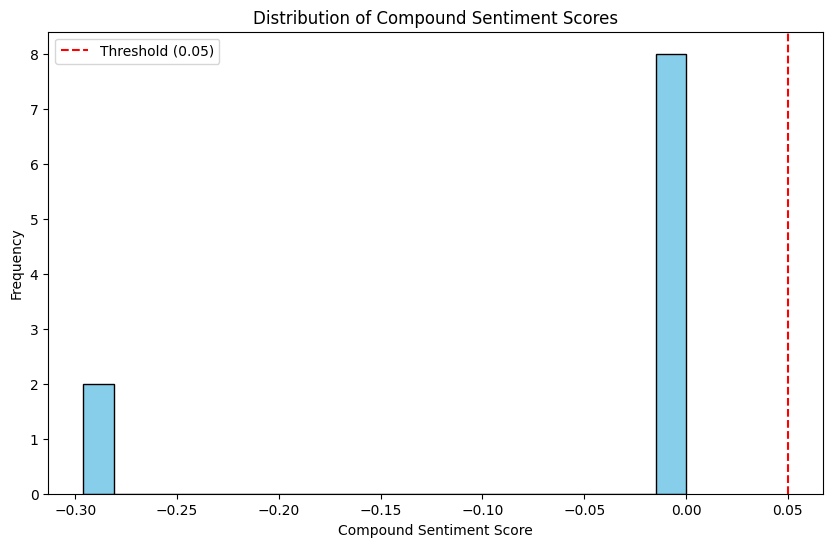

In [9]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
def scrape_articles(base_url):
    try:
        response = requests.get(base_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        article_links = [a['href'] for a in soup.find_all('a', href=True) if '/news/' in a['href']]

        articles = []

        for link in article_links:
            article_url = link if link.startswith('http') else base_url + link
            article_response = requests.get(article_url)
            article_soup = BeautifulSoup(article_response.text, 'html.parser')
            title = article_soup.find('h1').get_text() if article_soup.find('h1') else 'No Title'
            content_div = article_soup.find('div', class_='content')
            content = content_div.get_text() if content_div else 'No Content'

            articles.append({
                'title': title,
                'content': content,
                'url': article_url,
            })

        return articles

    except Exception as e:
        print(f"Failed to scrape {base_url}: {e}")
        return []
base_url = 'https://www.ndtv.com/'
articles = scrape_articles(base_url)
nltk.download('vader_lexicon')

def analyzesentiment(articles):
    sia = SentimentIntensityAnalyzer()

    for article in articles:
        sentimentscores = sia.polarity_scores(article['content'])
        article['sentiment'] = sentimentscores

    return articles

articleswithsentiment = analyzesentiment(articles)
def display_articles(articles):
    for article in articles:
        print(f"Title: {article['title']}")
        print(f"URL: {article['url']}")
        print(f"Sentiment: {article['sentiment']}")
        print("\n---\n")

display_articles(articleswithsentiment)
true_labels = np.random.choice([0, 1], size=len(articleswithsentiment))
predicted_labels = []
for article in articleswithsentiment:
    compound_score = article['sentiment']['compound']
    predicted_labels.append(1 if compound_score > 0.05 else 0)

# calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")
compound_scores = [article['sentiment']['compound'] for article in articleswithsentiment]
plt.figure(figsize=(10, 6))
plt.hist(compound_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(x=0.05, color='red', linestyle='--', label='Threshold (0.05)')
plt.legend()
plt.show()
